In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime
import yfinance as yf

In [11]:
# Define period
start = "2018-08-07"
end = "2023-08-07"
period = "1d"

covid_start = "2020-01-01"
covid_end = "2021-12-01"

## Hospitality Data Analysis

Name | Symbol
|----|-------|
HST | Host Hotels & Resorts Inc
HLT | Hilton Hotels Corporation
MAR | Marriott International Inc
CHH | Choice Hotels International Inc
H | Hyatt Hotels Corp
<!-- ABNB | Airbnb Inc -->

In [12]:
# Read Stocks CSV
stocks_hist = pd.read_csv("data/hosp.csv")
stocks_hist

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits,Stock,% change
0,2018-08-07 00:00:00-04:00,18.775551,18.775551,18.531938,18.601542,7584900,0.0,0.0,HST,-0.93
1,2018-08-08 00:00:00-04:00,18.671148,18.923462,17.809804,17.879408,12959400,0.0,0.0,HST,-4.24
2,2018-08-09 00:00:00-04:00,17.862002,17.966407,17.792399,17.827200,11420100,0.0,0.0,HST,-0.19
3,2018-08-10 00:00:00-04:00,17.757601,17.818504,17.522689,17.635796,8288300,0.0,0.0,HST,-0.69
4,2018-08-13 00:00:00-04:00,17.635794,17.740198,17.383480,17.487886,6328700,0.0,0.0,HST,-0.84
...,...,...,...,...,...,...,...,...,...,...
6280,2023-07-31 00:00:00-04:00,125.790001,127.800003,125.790001,126.349998,782800,0.0,0.0,H,0.45
6281,2023-08-01 00:00:00-04:00,125.750000,126.349998,123.459999,125.029999,754000,0.0,0.0,H,-0.57
6282,2023-08-02 00:00:00-04:00,123.550003,124.720001,122.300003,122.339996,1049900,0.0,0.0,H,-0.98
6283,2023-08-03 00:00:00-04:00,116.000000,116.000000,110.599998,111.989998,2209700,0.0,0.0,H,-3.46


In [41]:
# convert csv read date string back to date
stocks_hist_date = stocks_hist.copy()
stocks_hist_date['Date'] = pd.to_datetime(stocks_hist['Date'])

In [48]:
# Add Year Number
stocks_hist_date["Year"] = stocks_hist_date["Date"].year
stocks_hist_date["Year"]

0       2018
1       2018
2       2018
3       2018
4       2018
        ... 
6280    2018
6281    2018
6282    2018
6283    2018
6284    2018
Name: Year, Length: 6285, dtype: int64

In [20]:
# Group by Stock Ticker
stocks_grp = stocks_hist_date.groupby('Stock')

### Histogram of Percent Change Open to Close, per 

Stock
CHH    Axes(0.125,0.11;0.775x0.77)
H      Axes(0.125,0.11;0.775x0.77)
HLT    Axes(0.125,0.11;0.775x0.77)
HST    Axes(0.125,0.11;0.775x0.77)
MAR    Axes(0.125,0.11;0.775x0.77)
Name: % change, dtype: object

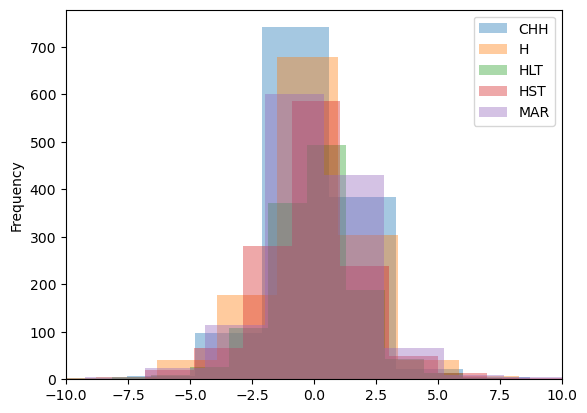

In [34]:
stocks_grp["% change"].plot(kind="hist",legend=True, alpha=0.4, xlim=[-10,10])

Stock
CHH    Axes(0.1,0.15;0.8x0.75)
H      Axes(0.1,0.15;0.8x0.75)
HLT    Axes(0.1,0.15;0.8x0.75)
HST    Axes(0.1,0.15;0.8x0.75)
MAR    Axes(0.1,0.15;0.8x0.75)
dtype: object

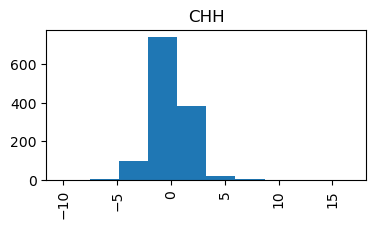

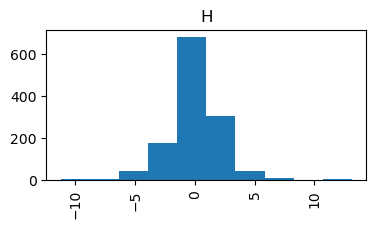

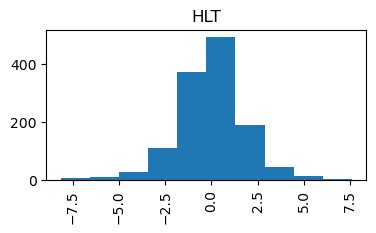

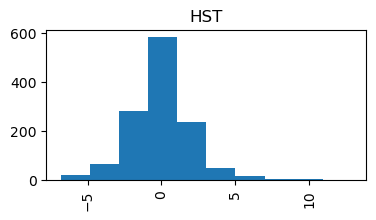

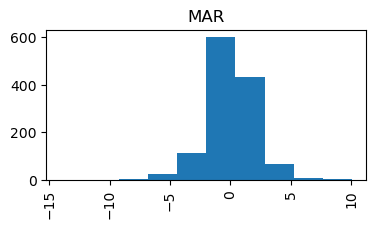

In [33]:
stocks_grp.hist(by="Stock", sharex=True, column="% change", figsize=[4,2])

### Closing Price over a 5-year period

In [24]:
# Set labels for based on Stock Ticker
labels = stocks_grp.sum(numeric_only=True).index

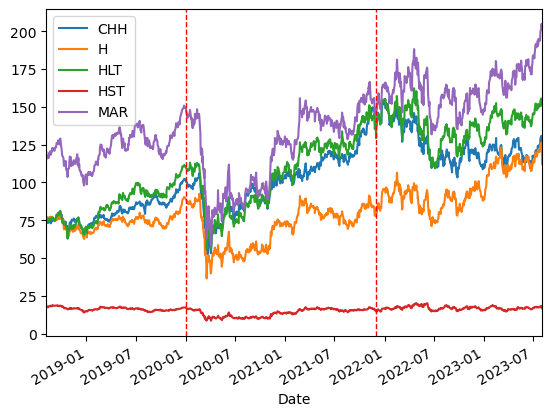

In [25]:
stocks_grp.plot(kind="line", x="Date", y="Close", 
                                 legend=True, 
                                 xlim=[stocks_hist["Date"].min(), stocks_hist["Date"].max()],
                                 ax=plt.gca(),
                                 )
plt.legend(labels)
plt.axvline(pd.to_datetime(covid_start), color='r', linestyle='--', linewidth='1')
plt.axvline(pd.to_datetime(covid_end), color='r', linestyle='--', linewidth='1')
plt.show()

## AdvisorShares Hotel ETF (BEDZ)
#### Top 10 Holdings (51.56% of Total Assets)

Name	| Symbol	| % Assets
|:--|--|--:|
Marriott International Inc Class A	| MAR	|5.76%
Booking Holdings Inc	| BKNG	| 5.68%
Ryman Hospitality Properties Inc	| RHP	| 5.51%
GreenTree Hospitality Group Ltd ADR	| GHG	| 5.20%
Bluegreen Vacations Holding Corp Class A	| BVH	| 5.14%
Airbnb Inc Ordinary Shares - Class A	| ABNB	| 4.99%
Boyd Gaming Corp	| BYD	| 4.93%
Royal Caribbean Group	| RCL	| 4.85%
Hyatt Hotels Corp Class A	| H	| 4.77%
Hilton Worldwide Holdings Inc	| HLT	| 4.74%

_Note:_ Dow Jones U.S. Hotels Index (^DJUSLG) does not have enough data available to be used 

In [46]:
# Read ETF/Index CSV
etf_df = pd.read_csv("data/hosp.csv")
etf_df

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits,Capital Gains
0,2021-04-21 00:00:00-04:00,24.558191,24.947370,24.558191,24.894482,84500,0.0,0.0,0.0
1,2021-04-22 00:00:00-04:00,24.987285,25.336547,24.857558,24.995268,15400,0.0,0.0,0.0
2,2021-04-23 00:00:00-04:00,25.146948,25.296632,25.126990,25.263700,11700,0.0,0.0,0.0
3,2021-04-26 00:00:00-04:00,25.526148,25.675832,25.369479,25.373470,33700,0.0,0.0,0.0
4,2021-04-27 00:00:00-04:00,25.516169,25.715748,25.426358,25.584026,29100,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...
572,2023-07-31 00:00:00-04:00,27.080000,27.090000,26.914000,26.914000,600,0.0,0.0,0.0
573,2023-08-01 00:00:00-04:00,26.520000,26.750000,26.520000,26.743999,800,0.0,0.0,0.0
574,2023-08-02 00:00:00-04:00,26.457001,26.490000,26.457001,26.490000,700,0.0,0.0,0.0
575,2023-08-03 00:00:00-04:00,25.665001,25.691999,25.665001,25.691999,300,0.0,0.0,0.0


In [47]:
# convert csv read date string back to date
etf_df['Date'] = pd.to_datetime(etf_df['Date'])